In [1]:
#Gerekli kütüphaneler import ediliyor.
import pandas as pd
import numpy as np

#matplotlib ve seaborn ile veri görselleştirme yapacağız.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
import warnings

In [2]:
#Üç sınıf içeren veri seti Excel'den okunuyor.
veriSeti_3C=pd.read_csv("../input/column_3C.csv")

#İki sınıf içeren veri seti Excel'den okunuyor.
veriSeti_2C=pd.read_csv("../input/column_2C.csv")

In [3]:
#Üç sınıf içeren veri seti ekrana bastrılıyor.
veriSeti_3C

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,sinif
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [4]:
#Aynı işlem iki sınıf içeren veri seti için de yapılıyor.
veriSeti_2C

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,sinif
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [5]:
#Veri setinin ilk beş elemanı ekrana bastırılıyor.
veriSeti_3C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,sinif
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [6]:
#Veri setinin ilk beş elemanı ekrana bastırılıyor.
veriSeti_2C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,sinif
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [7]:
#Veri setinin son beş elemanı ekrana bastırılıyor.
veriSeti_3C.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,sinif
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [8]:
#info komutu, ilgili veri seti hakkında bilgiler verir. Burada 3 sınıf içeren veri setiyle ilgili bilgileri ekrana bastırıyoruz.
veriSeti_3C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   sinif                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [9]:
#Veri setindeki özelliklerin(features) tipini "dytpes" parametresi ile öğreniriz.
veriSeti_3C.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
sinif                        object
dtype: object

In [10]:
#Veri seti hakkında daha detaylı bilgi almak için "describe" komutunu kullanırız.
veriSeti_3C.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


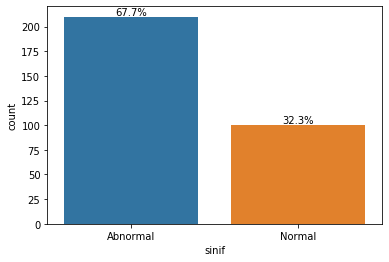

In [11]:
#Aşağıdaki kod, veriSeti_2C içerisindeki sınıf tiplerini, hangi sınıf tipinden kaç tane olduğunu ekrana yazdırır ve
#bar grafiği çizer.
ax=sns.countplot(x="sinif", data=veriSeti_2C)
veriSeti_2C.loc[:,'sinif'].value_counts()
ncount = len(veriSeti_2C)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

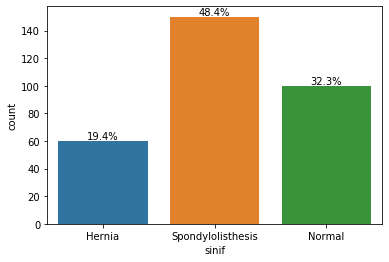

In [12]:
#Aşağıdaki kod, veriSeti_3C içerisindeki sınıf tiplerini, hangi sınıf tipinden kaç tane olduğunu ekrana yazdırır ve
#bar grafiği çizer.
ax=sns.countplot(x="sinif", data=veriSeti_3C)
veriSeti_3C.loc[:,'sinif'].value_counts()
ncount = len(veriSeti_3C)
plt.style.use('ggplot')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

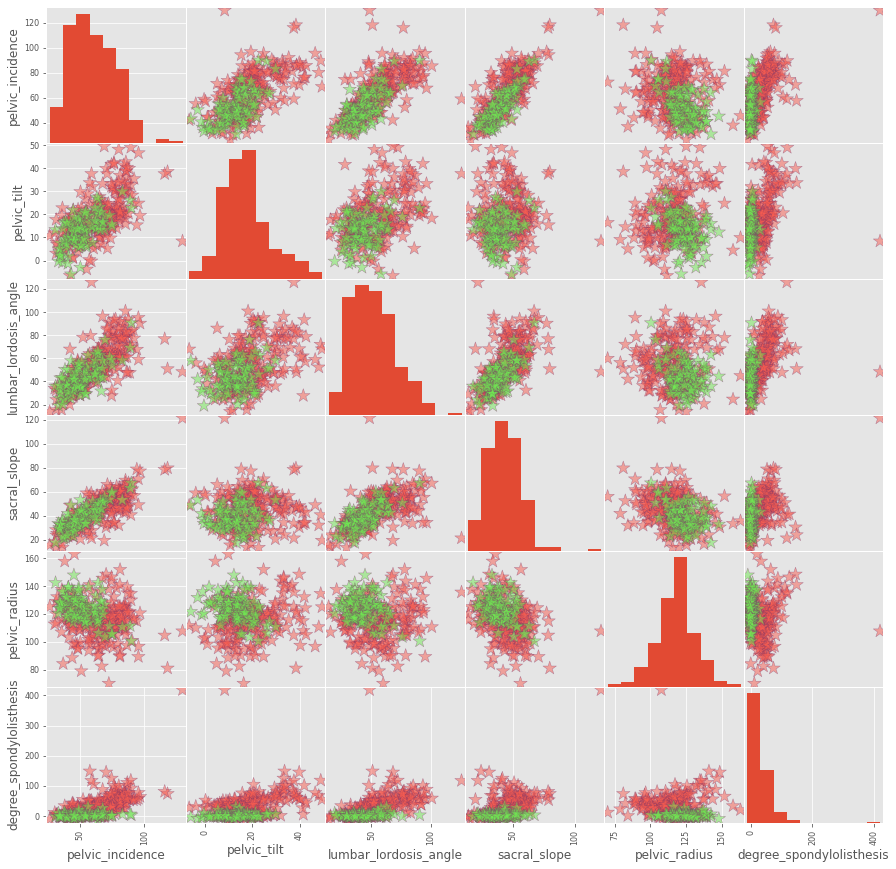

In [13]:
#Veri setinde iki farklı sınıf olduğu için, verileri abnormal ve normal olarak ayrıştırıp görselleştiriyoruz. 
color_list = ['#F85C50' if i=='Abnormal' else '#70E852' for i in veriSeti_2C.loc[:,'sinif']]
pd.plotting.scatter_matrix(veriSeti_2C.loc[:, veriSeti_2C.columns != 'sinif'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "#7C3668")
plt.show()

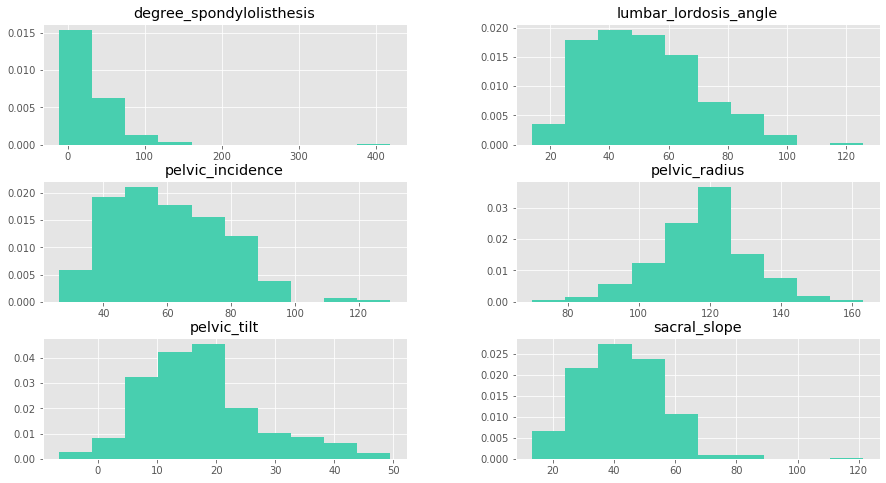

In [14]:
#Özellikleri(features) gösteren histogram grafiği. 
veriSeti_3C.hist(bins=10, density=True, figsize=(15,8), color='#48CFAF')
plt.show()

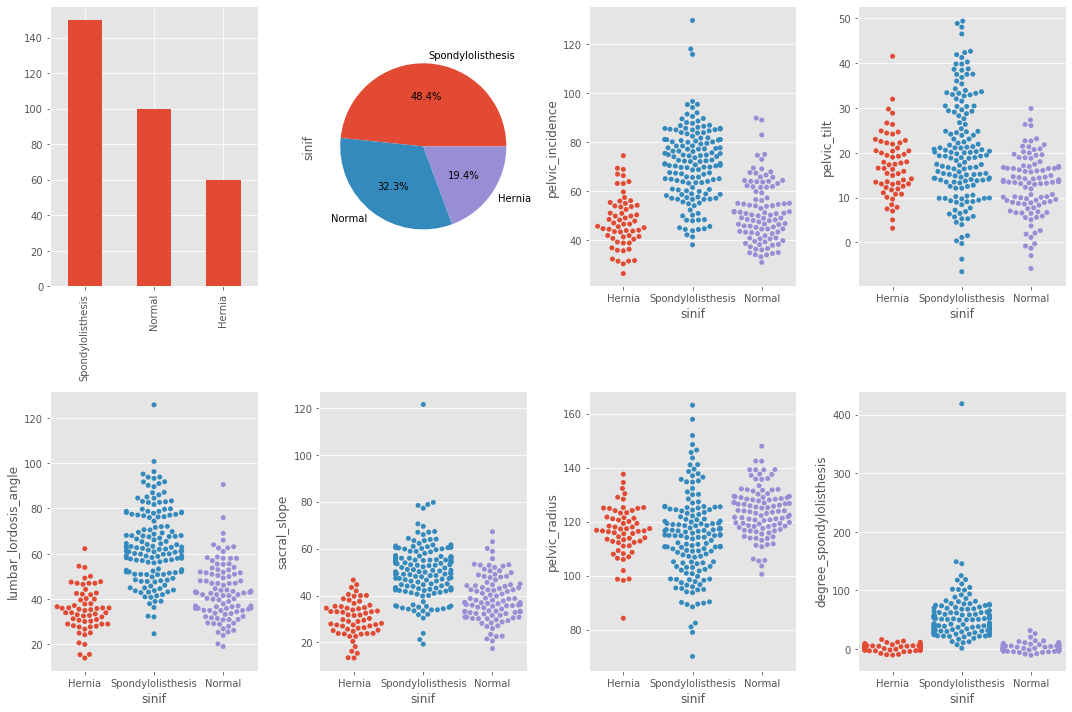

In [15]:
#Seaborn kütüphanesini kullanarak, veriSeti_3C içerisindeki sınıfların arasındaki ilişki grafiklerini swarmplot ile çizdiriyoruz
fig, dizi=plt.subplots(nrows=2, ncols=4, figsize=(15,10))
özellikler=veriSeti_3C.columns.values[:-1]    
sayaç=0
veriSeti_3C['sinif'].value_counts().plot.bar(ax=dizi[0,0])
veriSeti_3C['sinif'].value_counts().plot.pie(autopct="%1.1f%%",ax=dizi[0,1])
for i in range(2):
    for j in range(4):
        özellik=özellikler[sayaç]
        if (i==0 and j==0) or (i==0 and j==1):
            continue
        else:
            sns.swarmplot(x='sinif',y=özellik,                             
                data=veriSeti_3C, 
                ax=dizi[i, j])
        sayaç+=1
        if sayaç>=len(özellikler):
            break
    
plt.tight_layout()
plt.show()

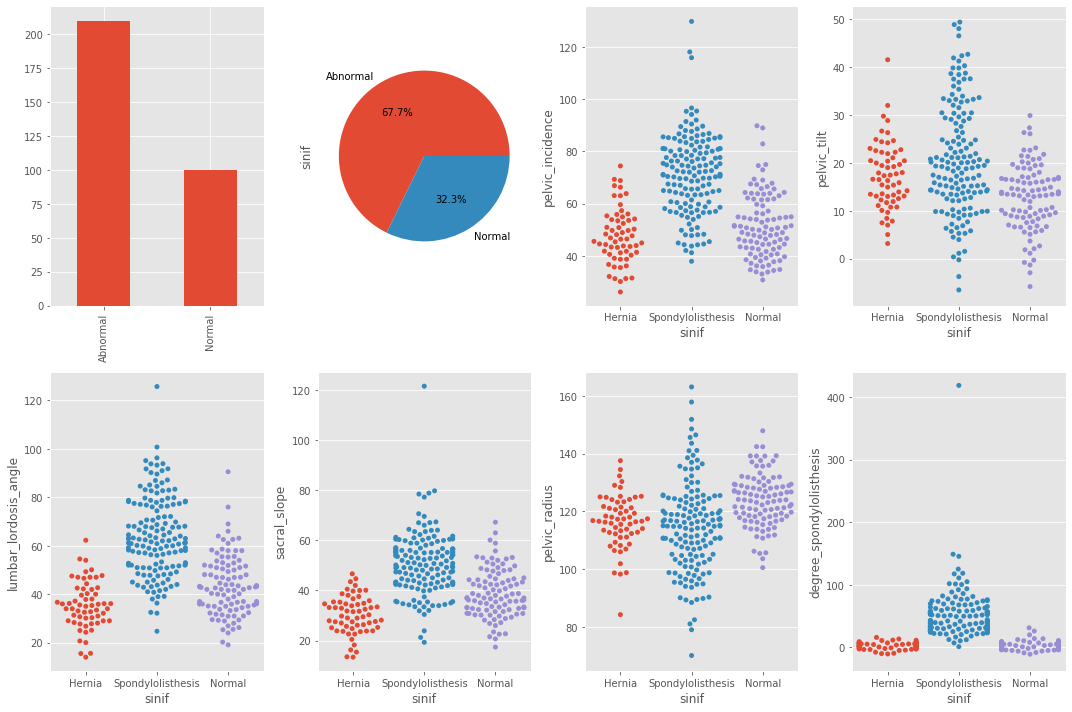

In [16]:
#Aynı işlemi, veriSeti_2C için tekrarlıyoruz.
fig, dizi=plt.subplots(nrows=2, ncols=4, figsize=(15,10))
özellikler=veriSeti_2C.columns.values[:-1]    
sayaç=0
veriSeti_2C['sinif'].value_counts().plot.bar(ax=dizi[0,0])
veriSeti_2C['sinif'].value_counts().plot.pie(autopct="%1.1f%%",ax=dizi[0,1])
for i in range(2):
    for j in range(4):
        özellik=özellikler[sayaç]
        if (i==0 and j==0) or (i==0 and j==1):
            continue
        else:
            sns.swarmplot(x='sinif',y=özellik,                             
                data=veriSeti_3C, 
                ax=dizi[i, j])
        sayaç+=1
        if sayaç>=len(özellikler):
            break
    
plt.tight_layout()
plt.show()

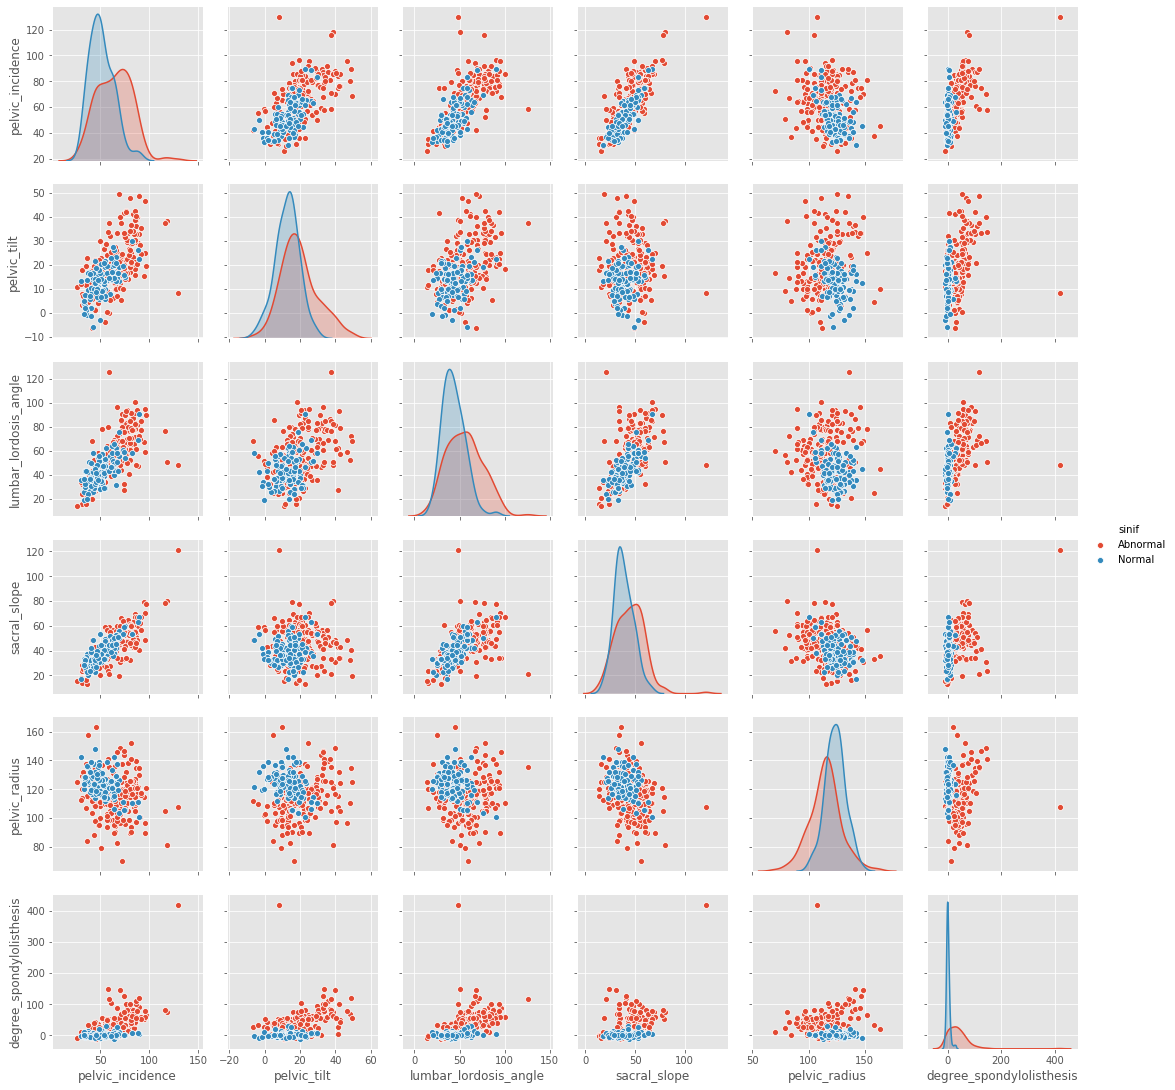

In [17]:
#veriSeti_2C içerisindeki sınıfların, özellikler ile ilişki grafiklerini pairplot ile çizdiriyoruz.
sns.pairplot(veriSeti_2C, hue="sinif", diag_kind="kde")
plt.show()

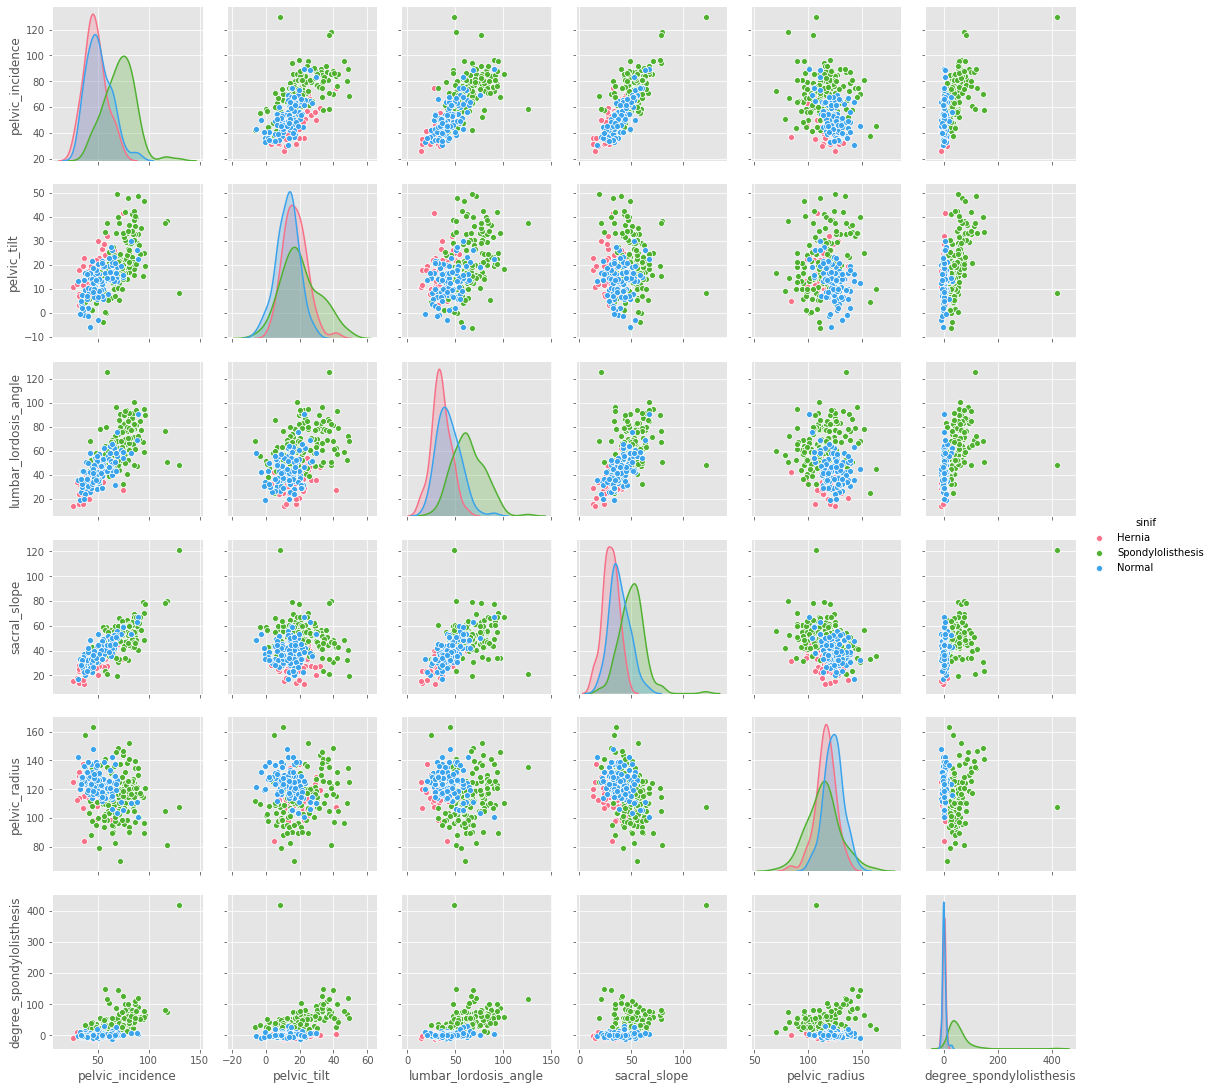

In [18]:
#Aynı işlemi veriSeti_3C için tekrarlıyoruz.
sns.pairplot(veriSeti_3C, hue="sinif", palette="husl")
plt.show()

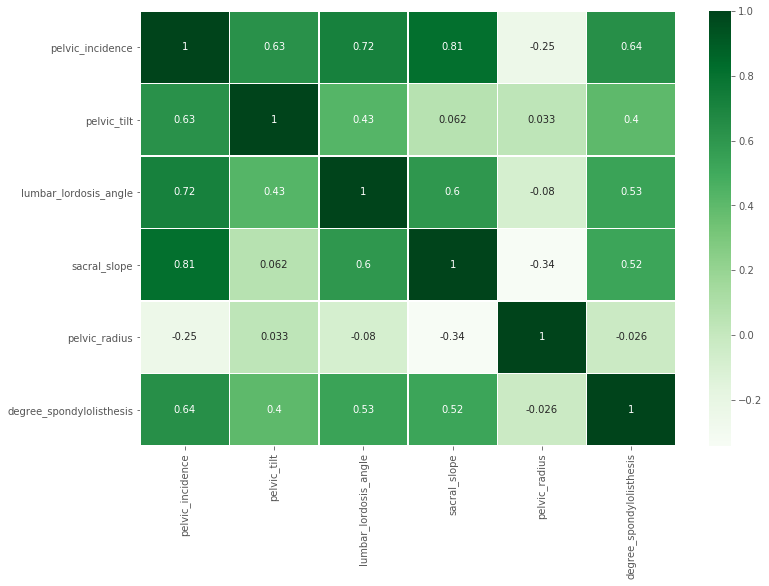

In [19]:
#Korelasyon matrisi ile her bir özelliğin aralarındaki ilişkiyi görebiliriz.
km=veriSeti_3C.corr()
fig, ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(km, annot=True, linewidth=.5, ax=ax, cmap="Greens")
plt.show()

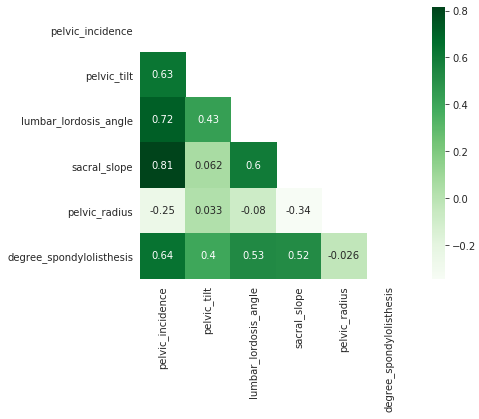

In [20]:
#Korelasyon matrisi, simetrik bir matristir. Yani sadece alt üçgen(veya üst üçgen) matrisi görselleştirmemiz yeterli. 
#Matris üzerinde maskeleme yaparak sadece alt üçgeni ekrana çizdirelim.
mask = np.zeros_like(km)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))    #mask=mask.T diyerek üst üçgeni ekrada çizdirebiliriz.
    ax = sns.heatmap(km, annot=True, mask=mask, square=True, cmap="Greens")

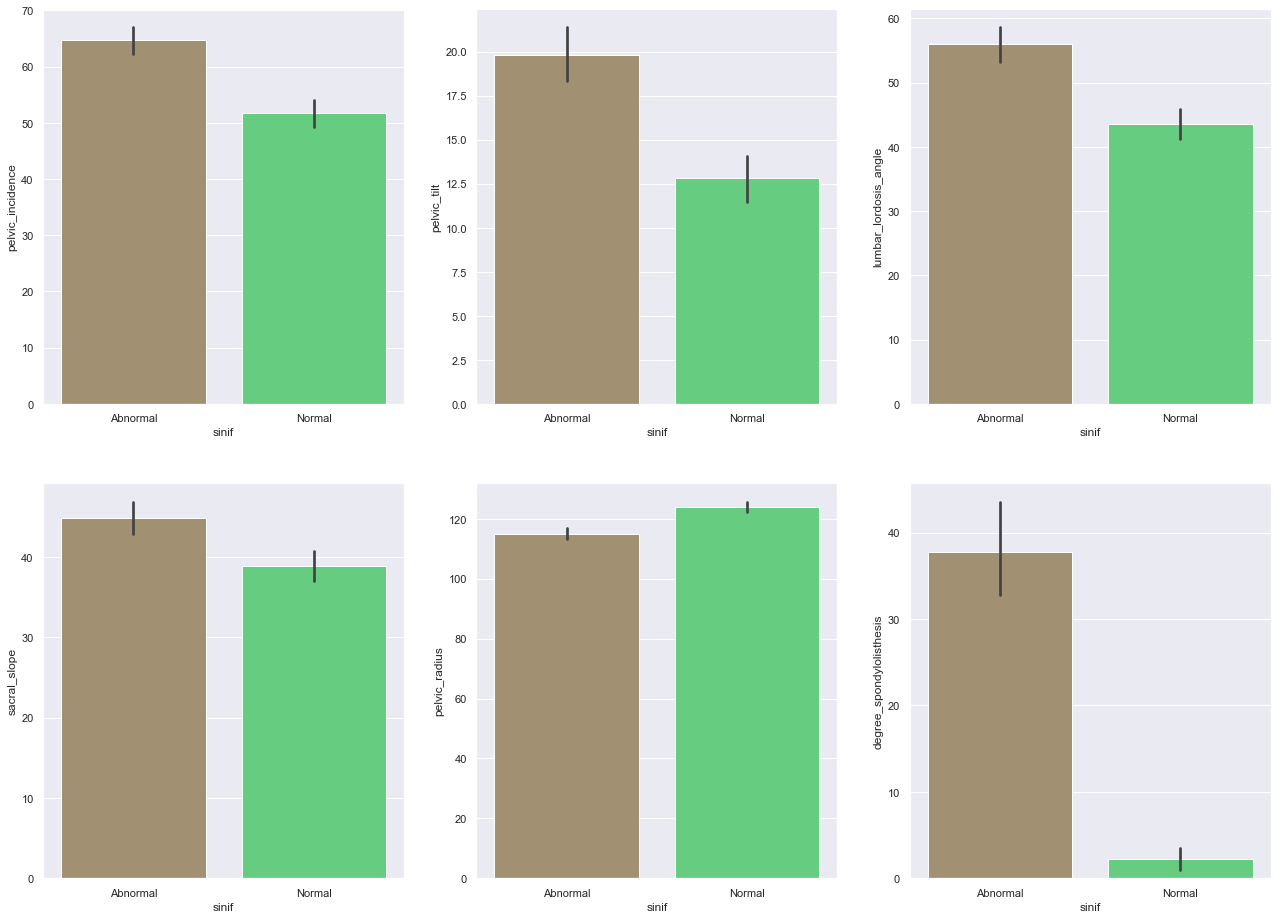

In [21]:
#veriSeti_2C için sınıfların her bir özellik ile arasındaki ilişki grafiğini barplot ile çizdiriyorum.
sns.set(style="darkgrid")
veriSeti_2C=pd.read_csv("column_2C.csv")
sütunAdı=veriSeti_2C.columns.values
sütunSayısı=len(sütunAdı)
fig, dizi=plt.subplots(2,3, figsize=(22,16))
sayaç=0
for i in range(2):
    for j in range(3):
        sns.barplot(x='sinif', y=sütunAdı[sayaç], data=veriSeti_2C, palette="terrain_r", ax=dizi[i][j])
        sayaç+=1

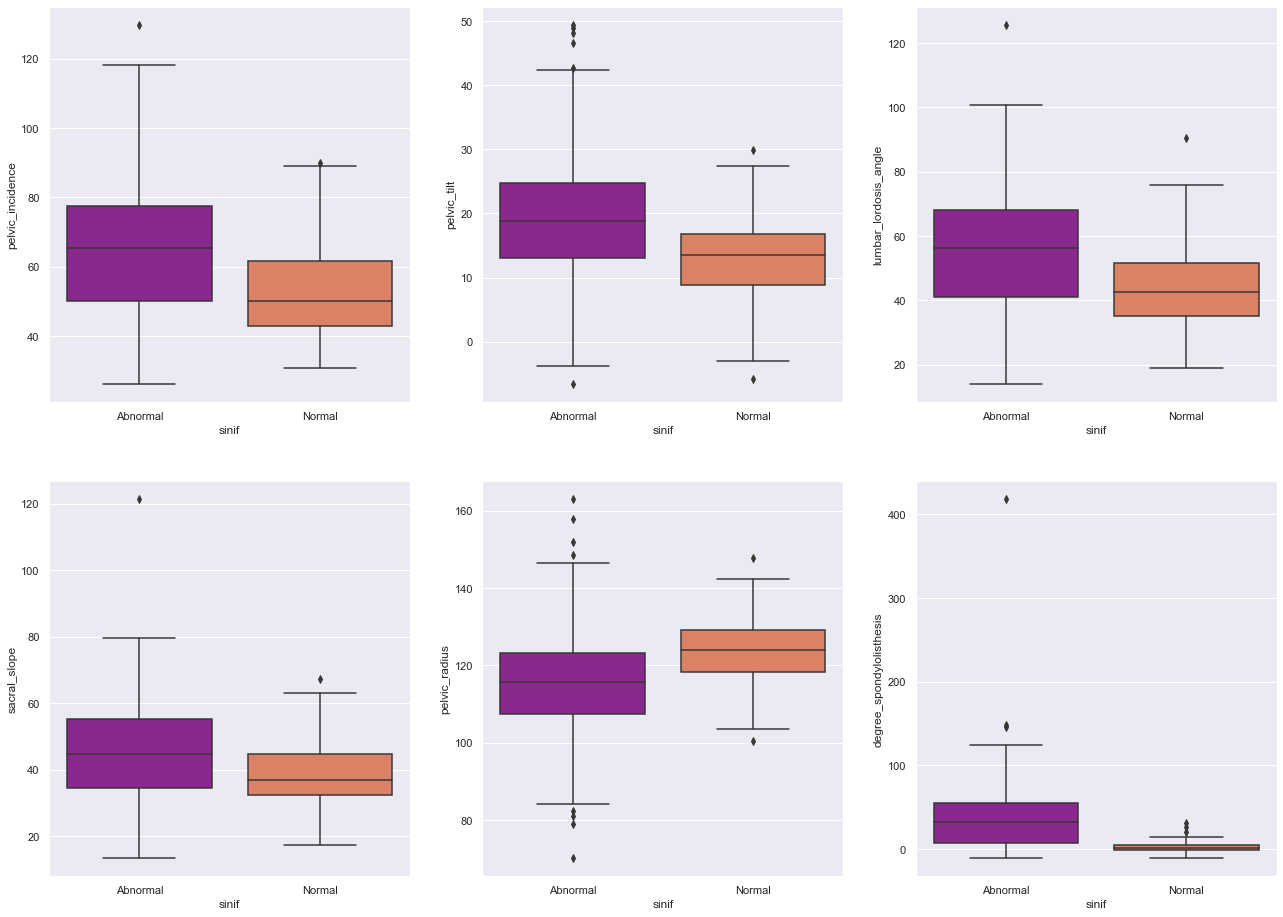

In [22]:
#veriSeti_2C için sınıfların her bir özellik ile arasındaki ilişki grafiğini boxplot ile çizdiriyorum.
sns.set(style="darkgrid")
veriSeti_2C=pd.read_csv("column_2C.csv")
sütunAdı=veriSeti_2C.columns.values
sütunSayısı=len(sütunAdı)
fig, dizi=plt.subplots(2,3, figsize=(22,16))
sayaç=0
for i in range(2):
    for j in range(3):
        sns.boxplot(x='sinif', y=sütunAdı[sayaç], data=veriSeti_2C, palette="plasma", ax=dizi[i][j])
        sayaç+=1

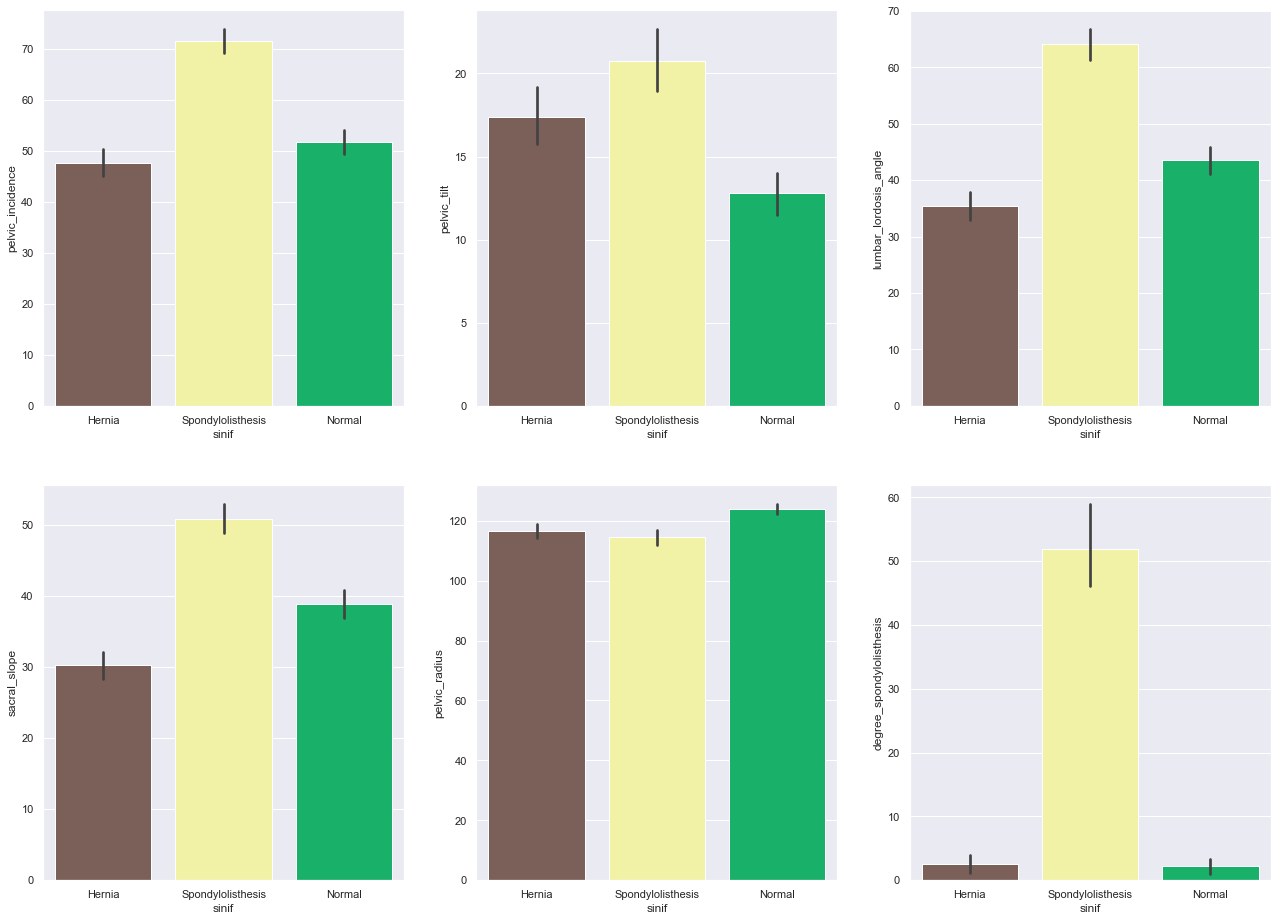

In [23]:
#veriSeti_3C için sınıfların her bir özellik ile arasındaki ilişki grafiğini barplot ile çizdiriyorum.
sns.set(style="darkgrid")
veriSeti_3C=pd.read_csv("column_3C.csv")
sütunAdı=veriSeti_3C.columns.values
sütunSayısı=len(sütunAdı)
fig, dizi=plt.subplots(2,3, figsize=(22,16))
sayaç=0
for i in range(2):
    for j in range(3):
        sns.barplot(x='sinif', y=sütunAdı[sayaç], data=veriSeti_3C, palette="terrain_r", ax=dizi[i][j])
        sayaç+=1

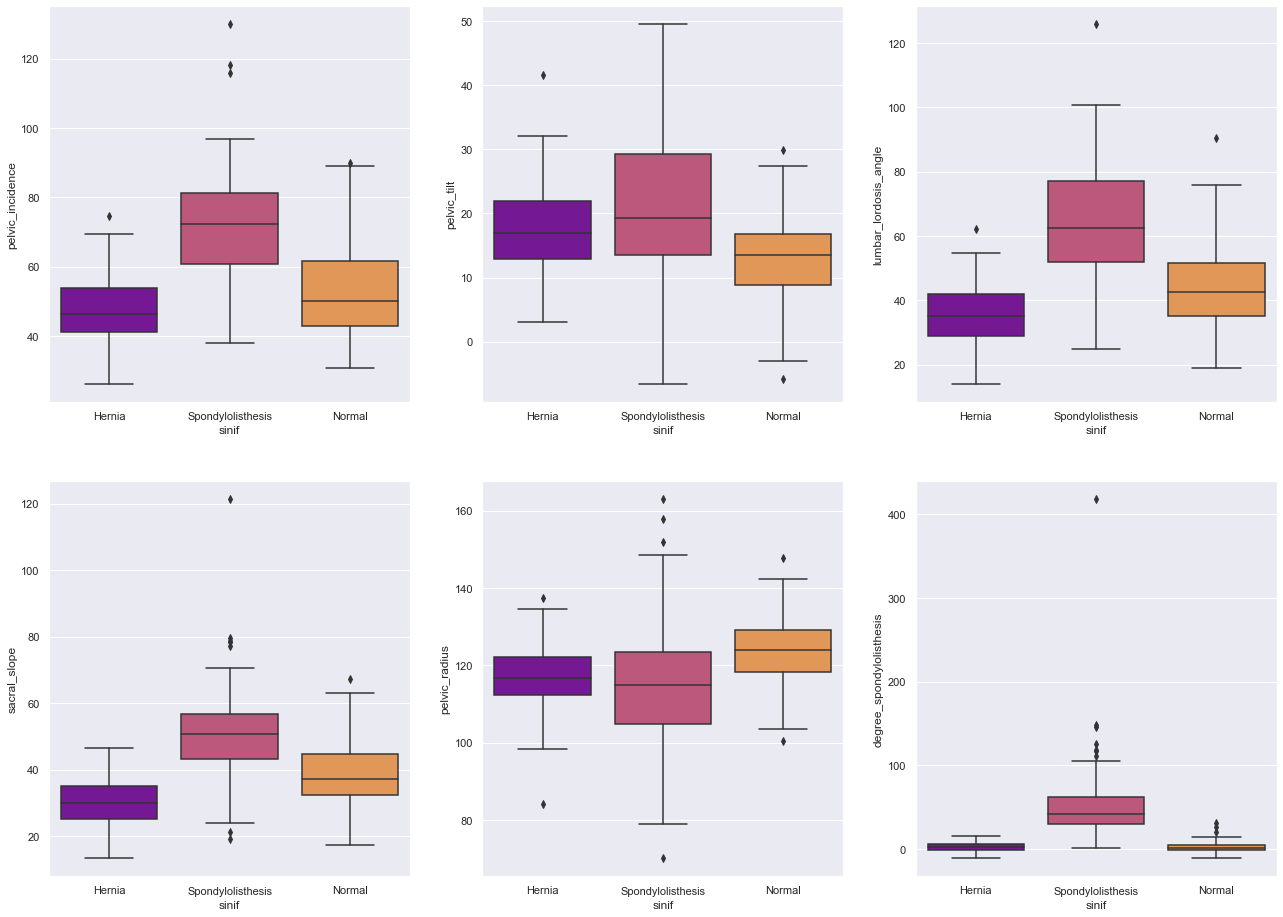

In [24]:
#veriSeti_3C için sınıfların her bir özellik ile arasındaki ilişki grafiğini boxplot ile çizdiriyorum.
sns.set(style="darkgrid")
veriSeti_3C=pd.read_csv("column_3C.csv")
sütunAdı=veriSeti_3C.columns.values
sütunSayısı=len(sütunAdı)
fig, dizi=plt.subplots(2,3, figsize=(22,16))
sayaç=0
for i in range(2):
    for j in range(3):
        sns.boxplot(x='sinif', y=sütunAdı[sayaç], data=veriSeti_3C, palette="plasma", ax=dizi[i][j])
        sayaç+=1

In [25]:
veriSeti_2C=pd.read_csv("column_2C.csv")
veriSeti_2C

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,sinif
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [26]:
#veriSeti_2C içerisindeki "Abnormal" verileri A'ya, "Normal" verileri N'ye attım.
A=veriSeti_2C[veriSeti_2C.sinif=="Abnormal"]
N=veriSeti_2C[veriSeti_2C.sinif=="Normal"]

In [27]:
#Kontrol amaçlı N'yi yazdırdım.
N

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,sinif
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [28]:
#"Normal" verilerin yerine 1, "Abnormal" verilerin yerine 0 yazdırdım ve bunu sınıf'a attım.
veriSeti_2C.sinif =[1 if each=="Normal" else 0 for each in veriSeti_2C["sinif"]]
sınıf=veriSeti_2C.sinif.values

In [29]:
#Kontrol amaçlı sınıf'ı yazdırdım
sınıf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
#veriSeti_2C'nin ilke beş elemanını kontrol ettim.
veriSeti_2C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,sinif
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [31]:
#drop komutuyla veriSeti_2C'den sinif özelliğini kaldırarak verileri x'e yazdırdım.
x = veriSeti_2C.drop(["sinif"], axis = 1)

In [32]:
#Artık elimde sadece 6  biyomekanik özellik var. Bu işlemi normalizasyonu gerçekleştirebilmek için yaptım.
x.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [33]:
#Normalizasyonun gerçekleştirimi
xnorm=(x-np.min(x))/(np.max(x)-np.min(x))

In [34]:
#Kontrol amaçlı ilk beş elemanı yazdırdım.
xnorm.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [35]:
#Veri ölçeklendirme yaparak, farklı değişkenleri eşit bir şekilde 
#karşılaştırmamıza yardımcı olabilir yöntemler kullanabiliriz.
print("NORMALİZASYON İŞLEMİ ÖNCESİ:",
      "\nMin:")
print(np.min(x))
print("\nMax:")
print(np.max(x))

print("\nNORMALİZASYON İŞLEMİ SONRASI:",
      "\nMin:")
print(np.min(xnorm))
print("\nMax:")
print(np.max(xnorm))

NORMALİZASYON İŞLEMİ ÖNCESİ: 
Min:
pelvic_incidence            26.147921
pelvic_tilt                 -6.554948
lumbar_lordosis_angle       14.000000
sacral_slope                13.366931
pelvic_radius               70.082575
degree_spondylolisthesis   -11.058179
dtype: float64

Max:
pelvic_incidence            129.834041
pelvic_tilt                  49.431864
lumbar_lordosis_angle       125.742385
sacral_slope                121.429566
pelvic_radius               163.071041
degree_spondylolisthesis    418.543082
dtype: float64

NORMALİZASYON İŞLEMİ SONRASI: 
Min:
pelvic_incidence            0.0
pelvic_tilt                 0.0
lumbar_lordosis_angle       0.0
sacral_slope                0.0
pelvic_radius               0.0
degree_spondylolisthesis    0.0
dtype: float64

Max:
pelvic_incidence            1.0
pelvic_tilt                 1.0
lumbar_lordosis_angle       1.0
sacral_slope                1.0
pelvic_radius               1.0
degree_spondylolisthesis    1.0
dtype: float64


In [36]:
#Veri setinin train-test ayrımı
x_train, x_test, y_train, y_test = train_test_split(xnorm, sınıf, test_size = 0.3, random_state = 8)

In [37]:
#Her bir algoritmanın sonucu bu diziye yazdırılacak.
SONUCLAR = []
#Çapraz doğrulama sonuçları bu diziye yazdırılacak.
ÇAPRAZ_DOĞRULAMA = []

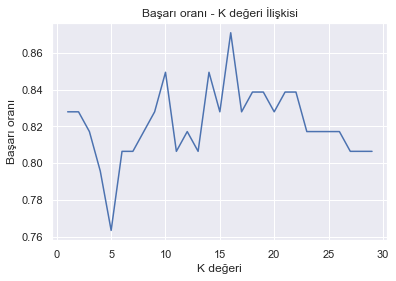

Max. başarı oranı: 0.8709677419354839 
K değeri: 15


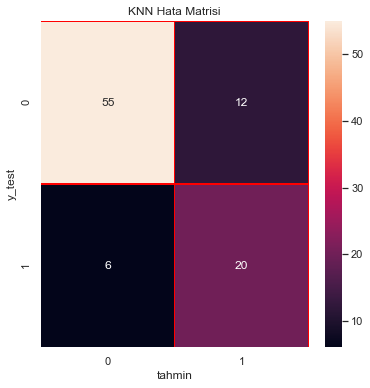


KNN Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        67
           1       0.62      0.77      0.69        26

   micro avg       0.81      0.81      0.81        93
   macro avg       0.76      0.80      0.77        93
weighted avg       0.82      0.81      0.81        93



In [38]:
#KNN Algoritması
knnSonucları = []
for each  in range(1, 30):
    knnSonuc = KNeighborsClassifier(n_neighbors = each)
    knnSonuc.fit(x_train, y_train)
    knnSonucları.append(knnSonuc.score(x_test, y_test))
    tahmin=knnSonuc.predict(x_test)
    
plt.plot(range(1, 30), knnSonucları)
plt.xlabel("K değeri")
plt.ylabel("Başarı oranı")
plt.title("Başarı oranı - K değeri İlişkisi")
plt.show()

print("Max. başarı oranı:",np.max(knnSonucları),"\nK değeri:", knnSonucları.index(np.max(knnSonucları)))

#Hata matrisi oluşturuluyor.
hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("KNN Hata Matrisi")
plt.show()
print('\nKNN Sınıflandırma Raporu:\n', classification_report(y_test, tahmin))
SONUCLAR.append(["KNN", np.max(knnSonucları)])
#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(knnSonuc, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["KNN Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

Naive Bayes algoritmasının doğruluğu: 0.7849462365591398


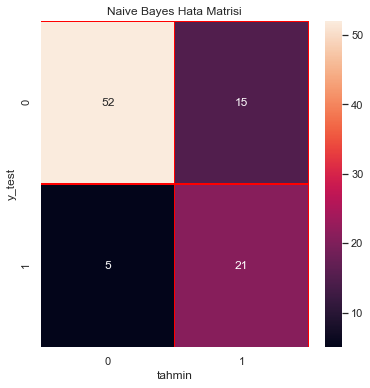


Naive Bayes Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        67
           1       0.58      0.81      0.68        26

   micro avg       0.78      0.78      0.78        93
   macro avg       0.75      0.79      0.76        93
weighted avg       0.82      0.78      0.79        93



In [39]:
#Navie Bayes Algoritması
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

tahmin=naive_bayes.predict(x_test)

#Test
NB_doğruluk  = naive_bayes.score(x_test, y_test)
SONUCLAR.append(["NB", NB_doğruluk])
print("Naive Bayes algoritmasının doğruluğu:", NB_doğruluk)
#Hata Matrisi
hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("Naive Bayes Hata Matrisi")
plt.show()
print('\nNaive Bayes Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))
#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(naive_bayes, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["Naive Bayes Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

In [40]:
#Uyarıları kapattım.
warnings.filterwarnings("ignore")

SVM algoritmasının doğruluğu:  0.9032258064516129


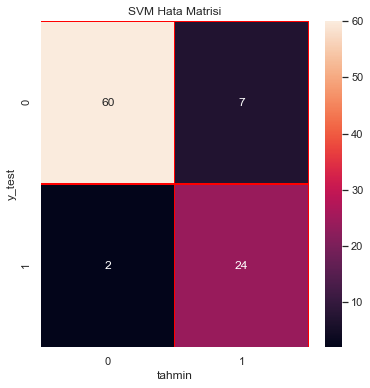


SVM Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        67
           1       0.77      0.92      0.84        26

   micro avg       0.90      0.90      0.90        93
   macro avg       0.87      0.91      0.89        93
weighted avg       0.91      0.90      0.91        93



In [41]:
#Support Vector Classification Algoritması
svm = SVC(C=100, kernel='linear')
svm.fit(x_train, y_train)
tahmin=svm.predict(x_test) 
#test
SVM_doğruluk = svm.score(x_test, y_test)
SONUCLAR.append(["SVM", SVM_doğruluk])
print("SVM algoritmasının doğruluğu: ", SVM_doğruluk)
#Hata Matrisi
hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("SVM Hata Matrisi")
plt.show()
print('\nSVM Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))
#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(svm, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["SVM Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

Decision Tree algoritmasının doğruluğu:  0.8709677419354839


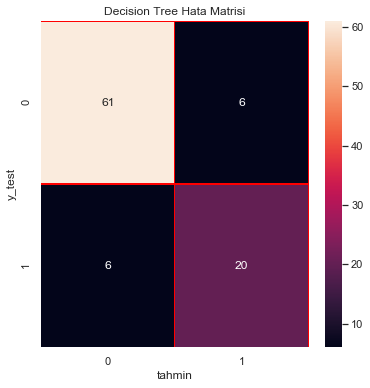


Decision Tree Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        67
           1       0.77      0.77      0.77        26

   micro avg       0.87      0.87      0.87        93
   macro avg       0.84      0.84      0.84        93
weighted avg       0.87      0.87      0.87        93



In [42]:
#DecisionTreeClassifier Algoritması
dt = DecisionTreeClassifier(random_state = 4)
dt.fit(x_train, y_train)
tahmin=dt.predict(x_test) 

#test
DT_doğruluk = dt.score(x_test, y_test)
SONUCLAR.append(["DT", DT_doğruluk])
print("Decision Tree algoritmasının doğruluğu: ", DT_doğruluk)
#Hata Matrisi
hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("Decision Tree Hata Matrisi")
plt.show()
print('\nDecision Tree Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))
#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(dt, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["Decision Tree Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

Random Forest algoritmasının doğruluğu:  0.9247311827956989


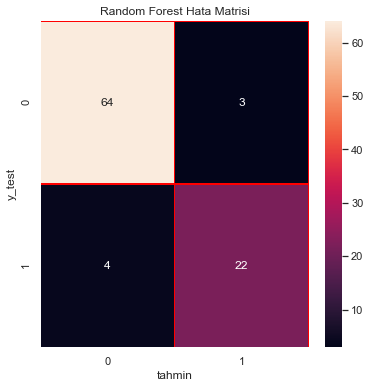


Random Forest Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.88      0.85      0.86        26

   micro avg       0.92      0.92      0.92        93
   macro avg       0.91      0.90      0.91        93
weighted avg       0.92      0.92      0.92        93



In [43]:
#RandomForestClassifier Algoritması
rf = RandomForestClassifier(n_estimators = 50, random_state = 48)
rf.fit(x_train, y_train)
tahmin=rf.predict(x_test) 

#test
RF_doğruluk = rf.score(x_test,y_test)
SONUCLAR.append(["RF", RF_doğruluk])
print("Random Forest algoritmasının doğruluğu: ", RF_doğruluk)
#Hata Matrisi
hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("Random Forest Hata Matrisi")
plt.show()
print('\nRandom Forest Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))
#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(rf, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["Random Forest Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

Logistic Regression algoritmasının doğruluğu:  0.9032258064516129


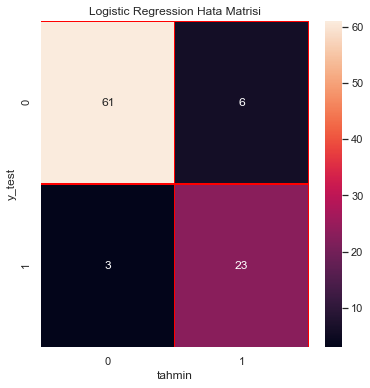


Logistic Regression Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.79      0.88      0.84        26

   micro avg       0.90      0.90      0.90        93
   macro avg       0.87      0.90      0.88        93
weighted avg       0.91      0.90      0.90        93



In [44]:
#LogisticRegression Algoritması
lr = LogisticRegression(C=100, penalty='l2', random_state=42)
lr.fit(x_train, y_train)

tahmin=lr.predict(x_test) 

#Test
LReg_doğruluk = lr.score(x_test, y_test)
SONUCLAR.append(["LReg.", LReg_doğruluk])
print("Logistic Regression algoritmasının doğruluğu: ", LReg_doğruluk)
#Hata Matrisi
hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("Logistic Regression Hata Matrisi")
plt.show()
print('\nLogistic Regression Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))
#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(lr, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["Logistic Regression Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

LinearSVC algoritmasının doğruluğu:  0.9247311827956989


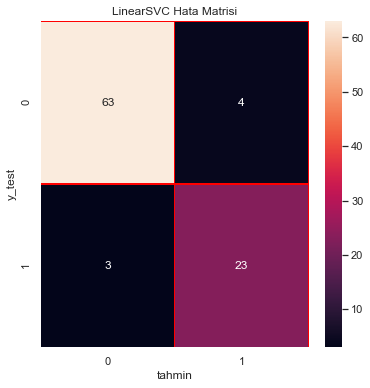


LinearSVC Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.85      0.88      0.87        26

   micro avg       0.92      0.92      0.92        93
   macro avg       0.90      0.91      0.91        93
weighted avg       0.93      0.92      0.93        93



In [45]:
#LinearSVC Algoritması
lr = LinearSVC(C=100, penalty='l2', random_state=8)
lr.fit(x_train, y_train)

tahmin=lr.predict(x_test)
#Test
L_SVC_doğruluk = lr.score(x_test, y_test)
SONUCLAR.append(["L_SVC.", L_SVC_doğruluk])
print("LinearSVC algoritmasının doğruluğu: ", L_SVC_doğruluk)
#Hata Matrisi
hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("LinearSVC Hata Matrisi")
plt.show()
print('\nLinearSVC Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))
#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(lr, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["LinearSVC Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

BaggingClassifier algoritmasının doğruluğu:  0.8817204301075269


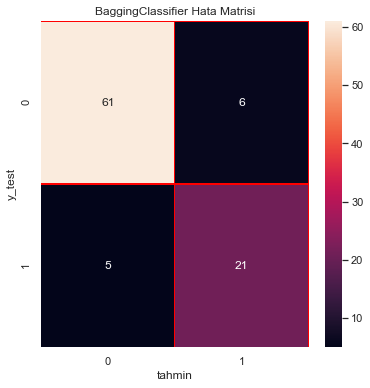


BaggingClassifier Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.78      0.81      0.79        26

   micro avg       0.88      0.88      0.88        93
   macro avg       0.85      0.86      0.85        93
weighted avg       0.88      0.88      0.88        93



In [46]:
#BaggingClassifier Algoritması
clf = BaggingClassifier(n_estimators=50, random_state=48)
clf.fit(x_train, y_train)

tahmin=clf.predict(x_test)

#Test
BC_doğruluk = clf.score(x_test, y_test)
SONUCLAR.append(["BC.", BC_doğruluk])
print("BaggingClassifier algoritmasının doğruluğu: ", BC_doğruluk)
#Hata Matrisi
hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("BaggingClassifier Hata Matrisi")
plt.show()
print('\nBaggingClassifier Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))

#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(clf, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["BaggingClassifier Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

In [47]:
#Algoritmalardan elde ettiğim başarıları yazdırıyorum.
SONUCLAR

[['KNN', 0.8709677419354839],
 ['NB', 0.7849462365591398],
 ['SVM', 0.9032258064516129],
 ['DT', 0.8709677419354839],
 ['RF', 0.9247311827956989],
 ['LReg.', 0.9032258064516129],
 ['L_SVC.', 0.9247311827956989],
 ['BC.', 0.8817204301075269]]

In [48]:
#Çapraz doğrulama sonuçlarını yazdırıyorum.
print("veriSeti_2C için Çapraz Doğrulama Sonuçları;")
ÇAPRAZ_DOĞRULAMA

veriSeti_2C için Çapraz Doğrulama Sonuçları;


[['KNN Çapraz Doğrulama Başarı Oranı:', 0.7387096774193549],
 ['Naive Bayes Çapraz Doğrulama Başarı Oranı:', 0.7870967741935484],
 ['SVM Çapraz Doğrulama Başarı Oranı:', 0.8129032258064516],
 ['Decision Tree Çapraz Doğrulama Başarı Oranı:', 0.7580645161290323],
 ['Random Forest Çapraz Doğrulama Başarı Oranı:', 0.7903225806451613],
 ['Logistic Regression Çapraz Doğrulama Başarı Oranı:', 0.8064516129032258],
 ['LinearSVC Çapraz Doğrulama Başarı Oranı:', 0.8161290322580644],
 ['BaggingClassifier Çapraz Doğrulama Başarı Oranı:', 0.8161290322580645]]

In [50]:
#Aynı işlem veriSeti_3C için yapılır.

In [51]:
veriSeti_3C=pd.read_csv("column_3C.csv")
veriSeti_3C

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,sinif
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [52]:
H=veriSeti_3C[veriSeti_3C.sinif=="Hernia"]
N=veriSeti_3C[veriSeti_3C.sinif=="Normal"]
S=veriSeti_3C[veriSeti_3C.sinif=="Spondylolisthesis"]

In [53]:
S

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,sinif
60,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Spondylolisthesis
61,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Spondylolisthesis
62,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Spondylolisthesis
63,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Spondylolisthesis
64,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Spondylolisthesis
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Spondylolisthesis
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Spondylolisthesis
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Spondylolisthesis
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Spondylolisthesis


In [54]:
veriSeti_3C.sinif =[1 if each=="Normal" else(2 if each=="Spondylolisthesis" else 0) for each in veriSeti_3C["sinif"]]
sınıf=veriSeti_3C.sinif.values

In [55]:
sınıf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [56]:
veriSeti_3C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,sinif
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [57]:
x = veriSeti_3C.drop(["sinif"], axis = 1)

In [58]:
x.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [59]:
xnorm=(x-np.min(x))/(np.max(x)-np.min(x))

In [60]:
xnorm.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [61]:
print("NORMALİZASYON İŞLEMİ ÖNCESİ:",
      "\nMin:")
print(np.min(x))
print("\nMax:")
print(np.max(x))


print("\nNORMALİZASYON İŞLEMİ SONRASI:",
      "\nMin:")
print(np.min(xnorm))
print("\nMax:")
print(np.max(xnorm))

NORMALİZASYON İŞLEMİ ÖNCESİ: 
Min:
pelvic_incidence            26.147921
pelvic_tilt                 -6.554948
lumbar_lordosis_angle       14.000000
sacral_slope                13.366931
pelvic_radius               70.082575
degree_spondylolisthesis   -11.058179
dtype: float64

Max:
pelvic_incidence            129.834041
pelvic_tilt                  49.431864
lumbar_lordosis_angle       125.742385
sacral_slope                121.429566
pelvic_radius               163.071041
degree_spondylolisthesis    418.543082
dtype: float64

NORMALİZASYON İŞLEMİ SONRASI: 
Min:
pelvic_incidence            0.0
pelvic_tilt                 0.0
lumbar_lordosis_angle       0.0
sacral_slope                0.0
pelvic_radius               0.0
degree_spondylolisthesis    0.0
dtype: float64

Max:
pelvic_incidence            1.0
pelvic_tilt                 1.0
lumbar_lordosis_angle       1.0
sacral_slope                1.0
pelvic_radius               1.0
degree_spondylolisthesis    1.0
dtype: float64


In [62]:
x_train, x_test, y_train, y_test = train_test_split(xnorm, sınıf, test_size = 0.3, random_state = 48)

In [63]:
SONUCLAR=[]
ÇAPRAZ_DOĞRULAMA = []

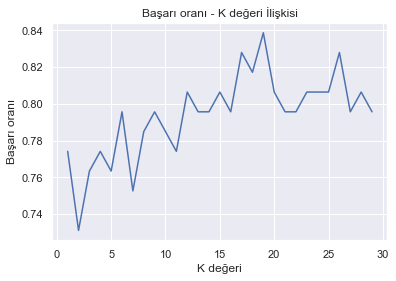

Max. başarı oranı: 0.8387096774193549 
K değeri: 18


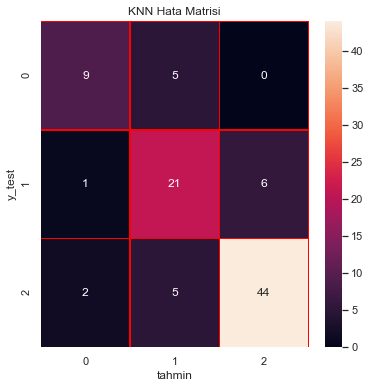


KNN Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.68      0.75      0.71        28
           2       0.88      0.86      0.87        51

   micro avg       0.80      0.80      0.80        93
   macro avg       0.77      0.75      0.76        93
weighted avg       0.80      0.80      0.80        93



In [64]:
knnSonucları = []
for each  in range(1, 30):
    knnSonuc = KNeighborsClassifier(n_neighbors = each)
    knnSonuc.fit(x_train, y_train)
    knnSonucları.append(knnSonuc.score(x_test, y_test))
    tahmin=knnSonuc.predict(x_test)
    
plt.plot(range(1, 30), knnSonucları)
plt.xlabel("K değeri")
plt.ylabel("Başarı oranı")
plt.title("Başarı oranı - K değeri İlişkisi")
plt.show()

print("Max. başarı oranı:",np.max(knnSonucları),"\nK değeri:", knnSonucları.index(np.max(knnSonucları)))
#Hata matrisi
hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("KNN Hata Matrisi")
plt.show()
print('\nKNN Sınıflandırma Raporu:\n', classification_report(y_test, tahmin))
SONUCLAR.append(["KNN", np.max(knnSonucları)])

#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(knnSonuc, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["KNN Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

Naive Bayes algoritmasının doğruluğu: 0.8924731182795699


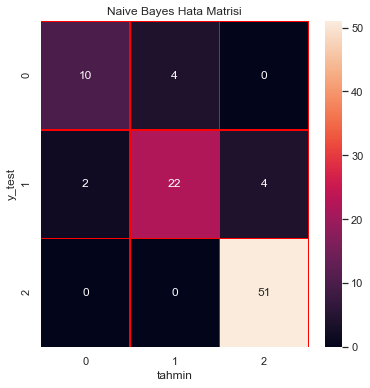


Naive Bayes Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.85      0.79      0.81        28
           2       0.93      1.00      0.96        51

   micro avg       0.89      0.89      0.89        93
   macro avg       0.87      0.83      0.85        93
weighted avg       0.89      0.89      0.89        93



In [65]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

tahmin=naive_bayes.predict(x_test)

#test
NB_doğruluk  = naive_bayes.score(x_test, y_test)
SONUCLAR.append(["NB", NB_doğruluk])
print("Naive Bayes algoritmasının doğruluğu:", NB_doğruluk)

hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("Naive Bayes Hata Matrisi")
plt.show()
print('\nNaive Bayes Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))

#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(naive_bayes, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["Naive Bayes Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

SVM algoritmasının doğruluğu: 0.9032258064516129


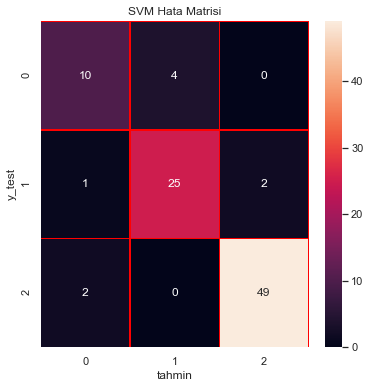


SVM Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.86      0.89      0.88        28
           2       0.96      0.96      0.96        51

   micro avg       0.90      0.90      0.90        93
   macro avg       0.86      0.86      0.86        93
weighted avg       0.90      0.90      0.90        93



In [66]:
svm = SVC(C=100, kernel='linear')
svm.fit(x_train, y_train)
tahmin=svm.predict(x_test) 
#test
SVM_doğruluk = svm.score(x_test, y_test)
SONUCLAR.append(["SVM", SVM_doğruluk])
print("SVM algoritmasının doğruluğu:", SVM_doğruluk)

hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("SVM Hata Matrisi")
plt.show()
print('\nSVM Sınıflandırma Raporu:\n', classification_report(y_test, tahmin))

#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(svm, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["SVM Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

Decision Tree algoritmasının doğruluğu:  0.9032258064516129


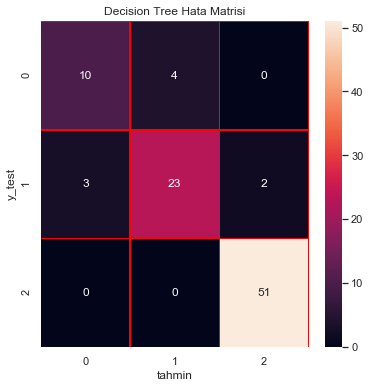


Decision Tree Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.85      0.82      0.84        28
           2       0.96      1.00      0.98        51

   micro avg       0.90      0.90      0.90        93
   macro avg       0.86      0.85      0.85        93
weighted avg       0.90      0.90      0.90        93



In [67]:
dt = DecisionTreeClassifier(random_state = 4)
dt.fit(x_train, y_train)
tahmin=dt.predict(x_test) 

#Test
DT_doğruluk = dt.score(x_test, y_test)
SONUCLAR.append(["DT", DT_doğruluk])
print("Decision Tree algoritmasının doğruluğu: ", DT_doğruluk)

hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("Decision Tree Hata Matrisi")
plt.show()
print('\nDecision Tree Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))

#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(dt, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["Decision Tree Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

Random Forest algoritmasının doğruluğu:  0.9032258064516129


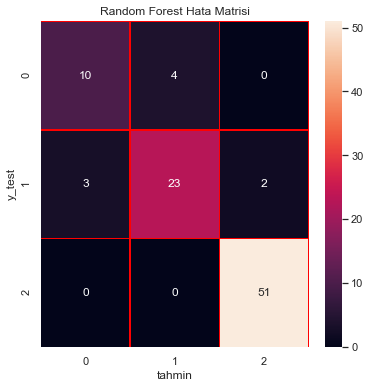


Random Forest Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.85      0.82      0.84        28
           2       0.96      1.00      0.98        51

   micro avg       0.90      0.90      0.90        93
   macro avg       0.86      0.85      0.85        93
weighted avg       0.90      0.90      0.90        93



In [68]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 48)
rf.fit(x_train, y_train)
tahmin=rf.predict(x_test) 

#Test
RF_doğruluk = rf.score(x_test,y_test)
SONUCLAR.append(["RF", RF_doğruluk])
print("Random Forest algoritmasının doğruluğu: ", RF_doğruluk)

hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("Random Forest Hata Matrisi")
plt.show()
print('\nRandom Forest Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))

#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(rf, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["Random Forest Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

Logistic Regression algoritmasının doğruluğu:  0.8924731182795699


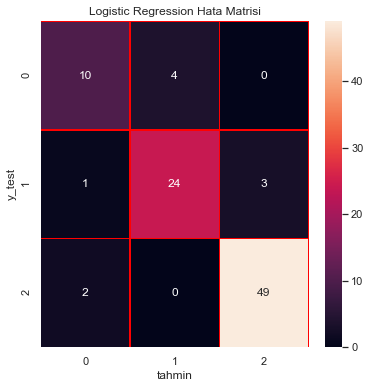


Logistic Regression Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.86      0.86      0.86        28
           2       0.94      0.96      0.95        51

   micro avg       0.89      0.89      0.89        93
   macro avg       0.86      0.84      0.85        93
weighted avg       0.89      0.89      0.89        93



In [69]:
lr = LogisticRegression(C=100, penalty='l2', random_state=8)
lr.fit(x_train, y_train)

tahmin=lr.predict(x_test) 

#Test
LReg_doğruluk = lr.score(x_test, y_test)
SONUCLAR.append(["LReg.", LReg_doğruluk])
print("Logistic Regression algoritmasının doğruluğu: ", LReg_doğruluk)

hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("Logistic Regression Hata Matrisi")
plt.show()
print('\nLogistic Regression Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))

#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(lr, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["Logistic Regression Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

LinearSVC algoritmasının doğruluğu:  0.9139784946236559


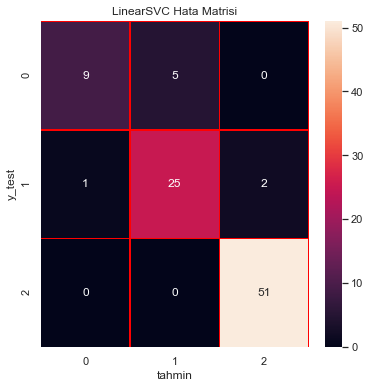


LinearSVC Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.83      0.89      0.86        28
           2       0.96      1.00      0.98        51

   micro avg       0.91      0.91      0.91        93
   macro avg       0.90      0.85      0.86        93
weighted avg       0.91      0.91      0.91        93



In [70]:
lr = LinearSVC(C=100, penalty='l2', random_state=8)
lr.fit(x_train, y_train)

tahmin=lr.predict(x_test)

#Test
L_SVC_doğruluk = lr.score(x_test, y_test)
SONUCLAR.append(["L_SVC.", L_SVC_doğruluk])
print("LinearSVC algoritmasının doğruluğu: ", L_SVC_doğruluk)

hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("LinearSVC Hata Matrisi")
plt.show()
print('\nLinearSVC Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))

#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(lr, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["LinearSVC Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

BaggingClassifier algoritmasının doğruluğu:  0.9032258064516129


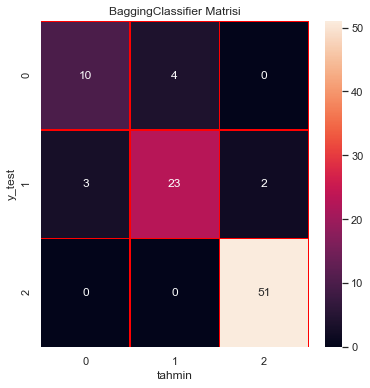


BaggingClassifier Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.85      0.82      0.84        28
           2       0.96      1.00      0.98        51

   micro avg       0.90      0.90      0.90        93
   macro avg       0.86      0.85      0.85        93
weighted avg       0.90      0.90      0.90        93



In [71]:
clf = BaggingClassifier(n_estimators=50, random_state=48)
clf.fit(x_train, y_train)

tahmin=clf.predict(x_test)

#Test
BC_doğruluk = clf.score(x_test, y_test)
SONUCLAR.append(["BC.", BC_doğruluk])
print("BaggingClassifier algoritmasının doğruluğu: ", BC_doğruluk)

hata_matrisi = confusion_matrix(y_test, tahmin)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(hata_matrisi, annot = True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("tahmin")
plt.ylabel("y_test")
plt.title("BaggingClassifier Matrisi")
plt.show()
print('\nBaggingClassifier Sınıflandırma Raporu: \n', classification_report(y_test, tahmin))

#Çapraz Doğrulama
k = 5
cv_result = cross_val_score(clf, xnorm, sınıf, cv=k)
ÇAPRAZ_DOĞRULAMA.append(["BaggingClassifier Çapraz Doğrulama Başarı Oranı:", np.sum(cv_result)/k])

In [72]:
#Sınıflandırma başarı oranları yazdırılıyor.
SONUCLAR

[['KNN', 0.8387096774193549],
 ['NB', 0.8924731182795699],
 ['SVM', 0.9032258064516129],
 ['DT', 0.9032258064516129],
 ['RF', 0.9032258064516129],
 ['LReg.', 0.8924731182795699],
 ['L_SVC.', 0.9139784946236559],
 ['BC.', 0.9032258064516129]]

In [73]:
#Çapraz doğrulama sonuçları yazdırılıyor.
print("veriSeti_3C için Çapraz Doğrulama Sonuçları;")
ÇAPRAZ_DOĞRULAMA

veriSeti_3C için Çapraz Doğrulama Sonuçları;


[['KNN Çapraz Doğrulama Başarı Oranı:', 0.7645161290322581],
 ['Naive Bayes Çapraz Doğrulama Başarı Oranı:', 0.835483870967742],
 ['SVM Çapraz Doğrulama Başarı Oranı:', 0.8483870967741935],
 ['Decision Tree Çapraz Doğrulama Başarı Oranı:', 0.8129032258064516],
 ['Random Forest Çapraz Doğrulama Başarı Oranı:', 0.8580645161290322],
 ['Logistic Regression Çapraz Doğrulama Başarı Oranı:', 0.832258064516129],
 ['LinearSVC Çapraz Doğrulama Başarı Oranı:', 0.8516129032258064],
 ['BaggingClassifier Çapraz Doğrulama Başarı Oranı:', 0.8516129032258064]]